# Chapter 7 - Fourier Transforms

As every physicist learns, a period function <i>f(x)</i> defined on a finite interval *0 &le; x &lt; L* can be written as a <strong>Fourier series</strong>. If the fuction is symmetric about the midpoint, we can write f(x) = k=0 &rarr; inf &sum; &alpha;<sub>k</sub>cos(2&pi;kx/L) where &alpha<sub>k</sub> are the coefficients whos values ddepend on the shape of the function. If the function is not symmetric, we can use f(x) = k=1 &rarr; inf &sum; &Beta;<sub>k</sub>cos(2&pi;kx/L). Note that we can combune these two as a sume of even and odd parts and have  

f(x) = k=0 &rarr; &infin; &sum; &alpha;<sub>k</sub>cos(2&pi;kx / L) + k=1 &rarr; inf &sum; &Beta;<sub>k</sub>cos(2&pi;kx / L)

An alternativfe way to write this as transforming cosines and sines to exp(whatevers), resulting in 

f(x) = k=-&infin; &rarr; &infin; &sum; &phi;<sub>k</sub>exp(i2&pi;kx / L)

Where &phi;<sub>k</sub> = 
\begin{cases} 
    \text{1/2 ( &alpha;<sub>-k</sub> + i&Beta;<sub>-k</sub>} \\
    \text{&alpha;<sub>0</sub>} \\
    \text{1/2 ( &alpha;<sub>k</sub> + i&Beta;<sub>k</sub>} \\
\end{cases}

If you can find the coefficient for a particular function *f(x)* then the Fourier Series gives a compact way of representing the entire function that comes in hand for all sourts of numerical calucations. Note that the Fourier series can be used only for periodic functions.

#### The Discrete Fourier Transform
Sometimes the f(x) in the section above cannot be found directly, using the continuous equation. This is typically approximated using a dsicrete transform  where &phi;<sub>k</sub>  = 1/N * n=0 &rarr; &infin; &Sigma;f(x<sub>n</sub>)exp(-i2&pi;kx<sub>n</sub> / L). The not normalized (missing 1/N) is also sometimes denoted using c<sub>k</sub>.Using the inverse discrete Fourier transform, we can find that y<sub>n</sub> = 1/N * (from k=0 &rarr; N-1 &Sigma c<sub>k</sub>exp(i2&pi;kn/N)).

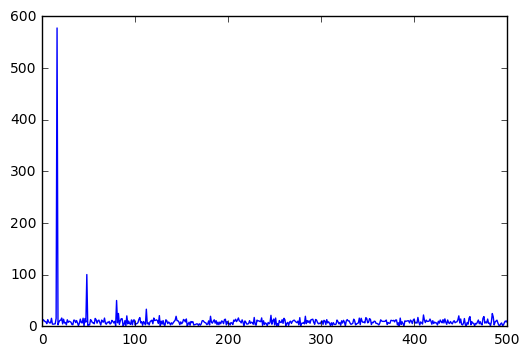

In [2]:
from numpy import zeros,loadtxt
from pylab import plot,xlim,show
from cmath import exp,pi

def dft(y):
    N = len(y)
    c = zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

y = loadtxt("cpresources\pitch.txt",float)
c = dft(y)
plot(abs(c)) # we use absolute value since they can be complex
xlim(0,500)
show()

#### 7.2.3 Physical Interpretations of Fourier Transforms
The Fourier transofrom breaks a function down into a set of real or complex sinusoidal waves. Each tear in a sume represetns one wave with its own well-defined frequency. If the function *f(x)* is a function in space then we have spactial frequencies; if it's a function in time then we have temporal frequencies, like musical notes. Saying that any function can be expressed as a sum of waves of given frequencies and the Fourier transform tells us what that sum is for any particular funtion: the coefficients of the transform tell us exactly how much of each frequency we have in the sum. Thus, by looking at the output of our Fourier transofrm, we can get a picture of the frequency breakdown of a signal is. 

#### Exercise 7.1 Fourier transforms of simple functions

#### Exercise 7.2 Detecting periodicity

## Discrete Cosine and Sine Transforms
Cosine can be used for symmetric periodic functions (about x = 1/2 L). This does not assume that the samples themself are period., unlike the DFT. Also, the sine transorms are used less often than the cosine tranforms because thye fore the funciton *f(x)* to be zero at either end of its range. This transform is used in compressing JPEG and MP3 (variant).

Note: any non-symmetric function can turn into a symmetric one if add the mirror image of itself.

## Fast Fourier Transforms

STart with a single sample, which is equal to itself. Combine each single sample into pairs, and then combine the pairs into fours creating larger and larger fast Fourier transforms. The advantage of this computation is speed. O(N^2) &rarr; O(log<sub>2</sub>(N)).

In [3]:
from numpy import array
from numpy.fft import rfft, irfft

y = array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], float)
c = rfft(y) # create complex array c containing the coefficients fo the Fourier tranform
z = irfft(c) # do the inverse of above
print(z)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


#### Exercise 7.3 Fourier tranforms of musical instruments

#### Exercise 7.4 Fourier filtering and smoothing

#### Exercise 7.5

#### 7.4.3 Fast Cosine and Sine Transforms

In [9]:
from numpy.fft import rfft,irfft
from numpy import empty, arange, exp,real,pi,array

def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    for n in range(N):
        y2[n] = y[n]
        y2[2*N-1-n] = y[n]
    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])
z = dct(array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], float))
print(z)

[  9.00000000e+00  -4.03603612e+00   1.01069846e-16  -4.32302109e-01
   3.30860932e-16  -1.41421356e-01  -5.91890020e-16  -5.71853781e-02
  -5.67283728e-17  -1.60358722e-02]


#### Exercise 7.6 Comparison of the DFT and DCT

#### Exercise 7.7 Fast Fourier transform

#### Exercise 7.8 Diffraction gratings

#### Exercise 7.9 Image Deconvolution